<a href="https://colab.research.google.com/github/nkljukin/Python-train/blob/main/titanic_Rand%20Forest_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

In [2]:
style = "<style>svg{width:70% !important;heigth:70% !important;}<style>"
HTML(style)

In [3]:
data = pd.read_csv("/content/sample_data/train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() # пропущенные значения

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data.Survived

In [7]:
X = pd.get_dummies(X) # знаковые переменные в числовые

In [8]:
X = X.fillna({'Age': X.Age.median()})

In [9]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=20, random_state=42)

In [10]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file = None, feature_names = list(X),
                                   class_names = ['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape

(596, 10)

In [15]:
clf.score(X, y)

0.9797979797979798

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

In [17]:
clf.score(X_train, y_train)

0.9798657718120806

In [18]:
clf.score(X_test, y_test)

0.7762711864406779

In [19]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=42)

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [21]:
clf.score(X_train, y_train)

0.8238255033557047

In [22]:
clf.score(X_test, y_test)

0.8203389830508474

In [23]:
max_depth_values = range(1, 100)

In [24]:
scores_data = pd.DataFrame()

In [25]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=42)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [26]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780
...,...,...,...
0,95,0.979866,0.776271
0,96,0.979866,0.776271
0,97,0.979866,0.776271
0,98,0.979866,0.776271


In [27]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score',	'test_score'],
                           var_name = 'set_type', value_name = 'score')

In [28]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.776271
194,96,test_score,0.776271
195,97,test_score,0.776271
196,98,test_score,0.776271


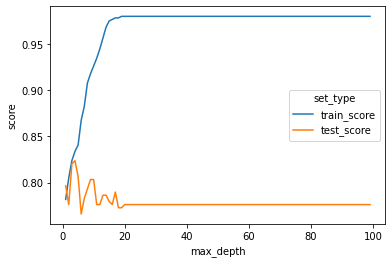

In [29]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=42)

In [32]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [33]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [34]:
max_depth_values = range(1, 20)
scores_data_1 = pd.DataFrame()

In [35]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=42)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'mean_cross_val': [mean_cross_val_score]})
    scores_data_1 = scores_data_1.append(temp_score_data)

In [36]:
scores_data_long_1 = pd.melt(scores_data_1, id_vars = ['max_depth'], 
                             value_vars = ['train_score',	'test_score', 'mean_cross_val'],
                             var_name = 'set_type', value_name = 'score')

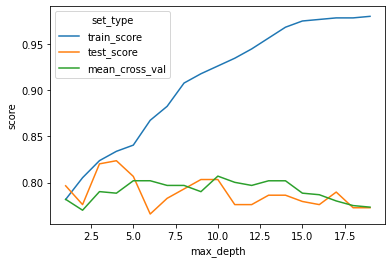

In [37]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long_1)

In [38]:
scores_data_long_1.query("set_type == 'mean_cross_val'").head(20)

,max_depth,set_type,score
38,1,mean_cross_val,0.781961
39,2,mean_cross_val,0.770196
40,3,mean_cross_val,0.790322
41,4,mean_cross_val,0.788627
42,5,mean_cross_val,0.802073
43,6,mean_cross_val,0.802073
44,7,mean_cross_val,0.797017
45,8,mean_cross_val,0.797003
46,9,mean_cross_val,0.790266
47,10,mean_cross_val,0.807073


In [39]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=10, random_state=42)

In [40]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.8

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
clf = tree.DecisionTreeClassifier(random_state =42)

In [43]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [44]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)

In [45]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [46]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [47]:
best_clf = grid_search_cv_clf.best_estimator_

In [48]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [49]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [50]:
from sklearn.metrics import precision_score, recall_score

In [51]:
y_pred = best_clf.predict(X_test)

In [52]:
precision_score(y_test, y_pred)

0.8297872340425532

In [53]:
recall_score(y_test, y_pred)

0.65

In [54]:
y_predicted_prob = best_clf.predict_proba(X_test)

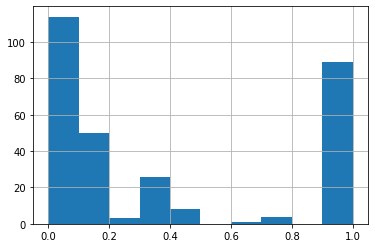

In [55]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [56]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.6, 1, 0)

In [57]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.44444444, 0.25      , 0.06086957, 1.        , 0.        ,
       0.75      , 0.12      , 0.13333333, 0.33333333, 0.36842105,
       0.18181818, 0.66666667])

In [58]:
precision_score(y_test, y_pred)

0.8297872340425532

In [59]:
recall_score(y_test, y_pred)

0.65

In [60]:
from sklearn.metrics import roc_curve, auc
import seaborn
from sklearn.datasets import make_classification

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr) # вычислить площадь под кривой

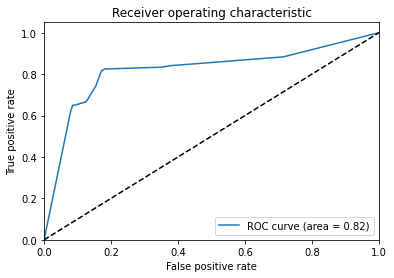

In [62]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")

In [72]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_split = 100,
                                  min_samples_leaf = 10)

In [73]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

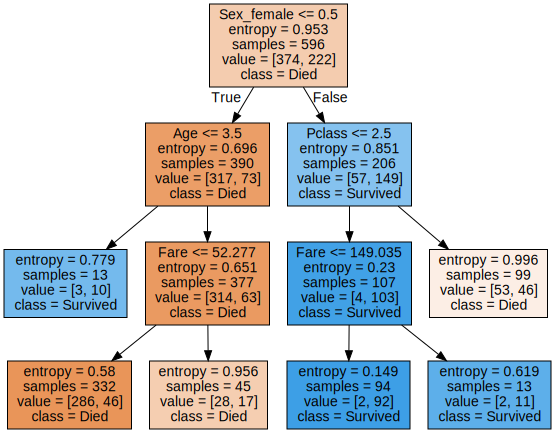

In [74]:
graph = Source(tree.export_graphviz(clf, out_file = None, feature_names = list(X),
                                   class_names = ['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf_rf = RandomForestClassifier()

In [77]:
parametrs = {'n_estimators': [10, 20, 30],
             'max_depth': range(1, 11),
             'min_samples_split': range(2, 11),
             'min_samples_leaf': range(1, 11)}

In [78]:
search = GridSearchCV(clf_rf, parametrs, cv = 5)
search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11),
                         'n_estimators': [10, 20, 30]})

In [ ]:
search.best_params_

In [81]:
best_clf = search.best_estimator_

In [83]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [85]:
feat_import = best_clf.feature_importances_

In [87]:
feat_import_df = pd.DataFrame({'features': list(X_train),
                              'feat_import': feat_import})

In [90]:
feat_import_df.sort_values('feat_import', ascending=False)

,features,feat_import
6,Sex_male,0.228375
4,Fare,0.186590
5,Sex_female,0.183920
1,Age,0.135495
0,Pclass,0.120258
2,SibSp,0.055556
3,Parch,0.034086
9,Embarked_S,0.026256
7,Embarked_C,0.020281
8,Embarked_Q,0.009182
